# **Live Code 2**
### **HACTIV8 Full Time Data Science Phase 0**

# **1. Perkenalan** 

## **1.1 Identitas**

> Nama  : Ropiudin

> Batch : FTDS OO2-HCK

> Live Code : Live Code 2

# **2 Problem Statement**

> **Problem 1**
> 1. Apakah kedua rumah mirip? jika iya, mengapa dan jika tidak, mengapa (jawab berdasarkan hasil perhitungan cosine similaritynya)? Dan keputusan yang akhirnya kamu pilih, rumah 1 atau rumah 2? apa pertimbangannya?
> 2. Jika meninjau dua buah vektor dan dihitung cosine similaritynya (cos theta), jelaskan secara singkat, jelas, padat apa makna cosine similarity yang bernilai 0 dan 1 (tinjau dari posisi dua vektor di koordinat kartesian)?
> 3. Mengapa cosine similarity harus melibatkan vektor bukan matriks?

> **Problem 2**
> 1. Berapa rata-rata, median, dan modus dari data tersebut sebelum dihilangkan outliernya? Bagaimana kecerendungan pemusatan datanya? jelaskan jawabanmu!
> 2. Sebelum melakukan extreme value analysis, kamu harus melakukan pengecekan skewness dari distribusi datanya. Apakah datanya skew atau normal? jelaskan jawabanmu!
> 3. Ada dua teknik untuk melakukan extreme value analysis, teknik yang mana yang kamu pakai? berikan alasanmu berdasarkan data!

# **3. Pustaka yang digunakan** 
> Pada Live Code ini, saya menggunakan 2 *library* yaitu pandas dan matplotlib

In [111]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# **4. Data Loading** 

## **Problem 1**

In [112]:
def plot_vector2d(vector2d, origin=[0, 0], **options):
    return plt.arrow(origin[0], origin[1], vector2d[0], vector2d[1],
              head_width=0.2, head_length=0.3, length_includes_head=True,
              **options)

In [113]:
v_rumah1 = np.array([100,240, 3, 3, 2, 0, 1, 1])
v_rumah2 = np.array([120, 200, 2, 2, 2, 1, 1, 1])

> Code di atas merupakan code untuk merepresentasikan data menjadi sebuah vector, dimana disetiap elemen pada vector diatas merupakan nilai dari setiap kolom pada tabel

In [114]:
v_rumah1

array([100, 240,   3,   3,   2,   0,   1,   1])

In [115]:
v_rumah2

array([120, 200,   2,   2,   2,   1,   1,   1])

## **Problem 2**

Pada Live Code ini, SQL Query yang di gunakan untuk mengakses datanya adalah sebagai berikut:

SELECT price,
      operation,
      property_type
FROM `bigquery-public-data.properati_properties_ar.properties_rent_201501`
WHERE operation = 'rent' AND property_type = 'apartment'

In [116]:
df = pd.read_csv('h8dsft_P0LC3_Ropiudin.csv')
df

,price,operation,property_type
0,2500.0,rent,apartment
1,3500.0,rent,apartment
2,2850.0,rent,apartment
3,1850.0,rent,apartment
4,1000.0,rent,apartment
...,...,...,...
1767,500.0,rent,apartment
1768,500.0,rent,apartment
1769,500.0,rent,apartment
1770,500.0,rent,apartment


> Code di atas merupakan code untuk import data atau membaca data dari tabel yang akan digunakan

In [117]:
df.head()

,price,operation,property_type
0,2500.0,rent,apartment
1,3500.0,rent,apartment
2,2850.0,rent,apartment
3,1850.0,rent,apartment
4,1000.0,rent,apartment


> Code df.head() di atas merupakan code untuk menampilkan tabel teratas yang bisa di tentukan jumlah baris yang mau di tampilkan pada variabel df

In [118]:
df.tail()

,price,operation,property_type
1767,500.0,rent,apartment
1768,500.0,rent,apartment
1769,500.0,rent,apartment
1770,500.0,rent,apartment
1771,500.0,rent,apartment


> Code df.tail() di atas merupakan code untuk menampilkan tabel terbawah yang bisa di tentukan jumlah baris yang mau di tampilkan pada variabel df

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1772 entries, 0 to 1771
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          1658 non-null   float64
 1   operation      1772 non-null   object 
 2   property_type  1772 non-null   object 
dtypes: float64(1), object(2)
memory usage: 41.7+ KB


> Code df.info() merupakan code untuk menampil kan informasi terkait data yang kita punya, yang berisikan jumlah baris dan kolom pada data serta nama - nama kolom yang terdapat pada data. Dan terdapat pula informasi missing values di setiap kolom pada data. 

> Pada kolom price jumlah barisnya tidak sama dengan jumlah baris pada data, yang berarti pada kolom price terdapat missing value

In [120]:
df.isnull().sum()

price            114
operation          0
property_type      0
dtype: int64

> Code df.isnull().sum() di atas merupakan code untuk menampilkan jumlah missing value di setiap kolom yang mana hanya terdapat missing value pada kolom price yaitu sebanyak 114

In [121]:
df['price'].fillna(0, inplace=True)

> Code di atas merupakan code untuk merubah missing value di kolom price, perubahan valus harus disesuai kan dengan tipe data pada kolomnya, seperti pada kolom price merubah missing value dangan value 0 karna pada kolom price memiliki tipe data float

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1772 entries, 0 to 1771
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          1772 non-null   float64
 1   operation      1772 non-null   object 
 2   property_type  1772 non-null   object 
dtypes: float64(1), object(2)
memory usage: 41.7+ KB


> Code df.info() untuk menampilkan informasi dan memastikan kembali bahwa di setiap kolom tidak terdapat missing value

# **5. Mathematical Calculations**

## **Problem 1**

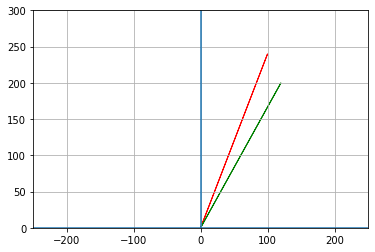

In [123]:
v_rumah1 = np.array([100,240, 3, 3, 2, 0, 1, 1])
v_rumah2 = np.array([120, 200, 2, 2, 2, 1, 1, 1])

plot_vector2d(v_rumah1, color='r')
plot_vector2d(v_rumah2, color='g')

plt.axis([-250, 250, 0, 300])  
plt.axvline(0)              
plt.axhline(0)              
plt.grid()
plt.show()

> Code di atas merupakan code untuk menampilkan plot dari vector rumah 1 dan vector rumah 2, yang mana berdasarkan hasil plot di atas terlihat bahwa vector rumah 1 dan vector rumah 2 memiliki sudut yang kecil, yang artinya antara vector rumah 1 dan vector rumah 2 kemungkinan memiliki kemiripan

> Untuk mengetahui kemiripan antara kedua vector dapat di ketahui dengan melihat cosine similarity

In [124]:
cos_theta = v_rumah1 @ v_rumah2 / (np.linalg.norm(v_rumah1) * np.linalg.norm(v_rumah2))
cos_theta

0.9893997002438046

> Code di atas merupakan code untuk melihat nilai dari cosine similarity atau nilai dari cos theta dari kedua vector, yang mana jika cos theta bernilai 0 yang berarti memiliki sudut 90 derajat, sehingga dapat disimpulkan dari kedua vector tidak ada kemiripan dan jika cos theta bernilai 1 yang berarti memilik sudut 0 derajat dapat disimpulkan bahwa kedua vektor terdapat kemiripan atau identik sama

> Dari hasil diatas diketahu bahwa nilai cos theta sebesar 0.9893997002438046 yang dapat di artikan bahwa antara vector rumah 1 dan vector rumah 2 sangat mirip

In [125]:
# convert to radian
rad = np.arccos(cos_theta)
rad

0.14573318497588464

In [126]:
# convert to degree
degree = np.degrees(rad)
degree

8.349896434117527

> Kita juga dapat mengetahu berapa derajat sudut yang terbentuk dari ke dua vektor, dari code di atas di peroleh hasil sudut antara vector rumah 1 dan rumah 2 adalah sebesar 8.35 derajat

## **Problem 2**

In [127]:
df

,price,operation,property_type
0,2500.0,rent,apartment
1,3500.0,rent,apartment
2,2850.0,rent,apartment
3,1850.0,rent,apartment
4,1000.0,rent,apartment
...,...,...,...
1767,500.0,rent,apartment
1768,500.0,rent,apartment
1769,500.0,rent,apartment
1770,500.0,rent,apartment


In [128]:
df['price'].mean()

4833.982505643341

> Code di atas merupakan code untuk melihat rata - rata dari kolom price. Dari hasil diatas di peroleh informasi bahwa nilai rata - rata pada kolom price sebesar 4833.982505643341

In [129]:
df['price'].median()

2500.0

> Code di atas merupakan code untuk melihat median atau nilai tengah yang sudah diurutkan datanya dari data pada kolom price, dari hasil di atas diperoleh informasi bahwa nilai median pada kolom price sebesar 2500.0

In [130]:
df['price'].mode()

0    0.0
dtype: float64

> Code di atas merupakan code untuk melihat modus atau data yang sering kali muncul dari dataframe, yang mana dari hasil di atas di peroleh nilai modus 0

In [131]:
df[
    (df['price'] == 0)
]

,price,operation,property_type
1193,0.0,rent,apartment
1194,0.0,rent,apartment
1195,0.0,rent,apartment
1196,0.0,rent,apartment
1197,0.0,rent,apartment
...,...,...,...
1755,0.0,rent,apartment
1756,0.0,rent,apartment
1757,0.0,rent,apartment
1758,0.0,rent,apartment


> Dengan code diatas kita juga bisa melihat seberapa banyak nilai modus itu keluar pada data, yang mana dari hasil di atas kita mengetahui bahwa nilai 0 muncul sebanyak 567 kali pada data

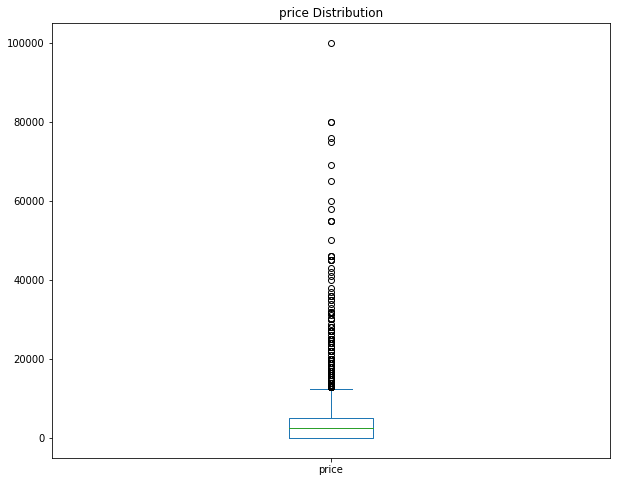

In [132]:
df['price'].plot(kind='box', title='price Distribution', figsize=(10,8))
plt.show()

> Code di atas merupakan code untuk membuat grafik berupa boxplot. Dari boxplot kita bisa melihat apakah pada data terdapat outlier atau tidak. Berdasarkan hasil boxplot di atas terdapat outlier pada data yaitu data yang menjauh dari penyebaran data, sehingga perlu di lakukan handling outlier

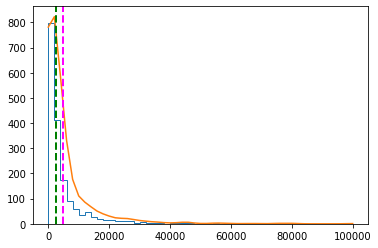

In [133]:
price = df['price']
density = stats.gaussian_kde(price)
n, x, _ = plt.hist(price, histtype='step', bins=50)  
plt.plot(x, density(x)*10**6.87)
plt.axvline(price.mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(price.median(), color='green', linestyle='dashed', linewidth=2)
plt.show()

> Code di atas merupakan code untuk melihat grafik distribusi dari data, yang nantinya akan menentukan handling outlier yang di gunakan. Sebelum melakukan handling outlier kita harus mengetahui terlebih dahulu distibusi dari data.

> Jika data **berdistribusi normal**, handling outlier yang digunakan adalah **Z score** dan apabila data **berdistribusi berbentuk skew** baik kekiri maupun kekanan, handling outlier yang digunakan adalah **Tukey**

> Dari hasil di atas, diketahui bahwa data yang kita punya miliki distribusi berbentuk skew ke kanan, sehingga handling outlier yang digunakan adalah **Tukey**

In [134]:
quartiles = np.percentile(df['price'], [25, 50, 75])

print('Q1: %.3f' % quartiles[0])
print('Median: %.3f' % quartiles[1])
print('Q3: %.3f' % quartiles[2])

Q1: 0.000
Median: 2500.000
Q3: 5000.000


In [135]:
Q1 = quartiles[0]
Q3 = quartiles[2]
IQR = quartiles[2] - quartiles[0]

> Untuk menggunakan Tukey pada handling outlier, kita harus menentukan terlebih dahulu quartil pada data supaya bisa mencari batas atas dan batas bawah pada aturan Tukey, yang mana pada Tukey memiliki rumus untuk mendeteksi adanya outlier sebagai berikut:

> ${Q_{3}+1.5*IQR}$ => sebagai batas atas

> ${Q_{1}-1.5*IQR}$ => sebagai batas bawah

> Pada aturan Tukey, jika terdapat data yang berada di luar batas bawah dan batas atas, maka data tersebut dudeteksi sebagai data outlier

> Dari code di atas, diperolah Q1, Q3 dan IQR yang nanti di gunakan untuk mencari nilai batas bawah dan batas atas

In [136]:
Q1 - (1.5*IQR)

-7500.0

> Code di atas merupakan code untuk menghitung batas bawah pada aturan Tukey, dari hasil code di atas diperoleh nilai batas bawah adalah -7500.0

In [137]:
Q3 + (1.5*IQR)

12500.0

> Code di atas merupakan code untuk menghitung batas atas pada aturan Tukey, dari hasil code di atas diperoleh nilai batas atas adalah 12500.0

In [138]:
df[
    (df['price'] > 12500.0)
    ]

,price,operation,property_type
21,15000.0,rent,apartment
26,19000.0,rent,apartment
27,30000.0,rent,apartment
29,13500.0,rent,apartment
33,45000.0,rent,apartment
...,...,...,...
928,25000.0,rent,apartment
933,15000.0,rent,apartment
952,24000.0,rent,apartment
986,13000.0,rent,apartment


In [139]:
df[
    (df['price'] < -7500.0)
    ]

,price,operation,property_type


> > Setelah kita mengetahui batas atas dan batas bawah, selanjutnya kita melihat apakah ada data yang berada di luar batas atas dan batas bawah. Dari hasil code di atas, diketahui bahwa terdapat data yang berada di luar batas atas, yaitu sebanyak 7 data. Sehingga dapat disimpulkan bahwa pada data pembuangan sampah di tempat pembuangan sampah TDS LANDFILL terdapat data outlier sebanyak 7 data

In [144]:
New_df = df.drop(df[df.price > 12500.0].index)
New_df

,price,operation,property_type
0,2500.0,rent,apartment
1,3500.0,rent,apartment
2,2850.0,rent,apartment
3,1850.0,rent,apartment
4,1000.0,rent,apartment
...,...,...,...
1767,500.0,rent,apartment
1768,500.0,rent,apartment
1769,500.0,rent,apartment
1770,500.0,rent,apartment


> Code di atas merupakan code untuk menghapus atau drop data outlier yang berada pada kolom price. Sehingga diperoleh data baru yang sudah dihapus outliernya

In [141]:
New_df[
    (New_df['price'] > 12500.0)
    ]

,price,operation,property_type


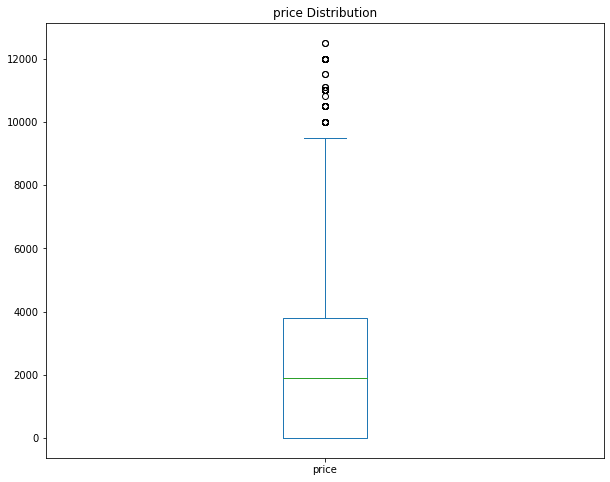

In [142]:
New_df['price'].plot(kind='box', title='price Distribution', figsize=(10,8))
plt.show()

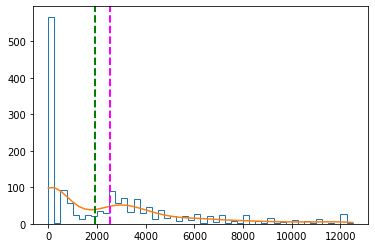

In [143]:
price = New_df['price']
density = stats.gaussian_kde(price)
n, x, _ = plt.hist(price, histtype='step', bins=50)  
plt.plot(x, density(x)*10**5.6)
plt.axvline(price.mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(price.median(), color='green', linestyle='dashed', linewidth=2)
plt.show()

> Code di atas merupakan code untuk melihat apakah data outlier sudah terhapus atau belum. Berdasarkan hasil code di atas diketahui bahwa sudah tidak terdapat data outlier pada kolom price yang diliat dari screening data dan dari grafik boxplot serta distribusi data

# **6. Hasil**

## **Problem 1**

### 1. Apakah kedua rumah mirip? jika iya, mengapa dan jika tidak, mengapa (jawab berdasarkan hasil perhitungan cosine similaritynya)? Dan keputusan yang akhirnya kamu pilih, rumah 1 atau rumah 2? apa pertimbangannya?

> Mirip, dikarnakan dari hasil cosine similarity miliki nilai cos theta sebesar  0.9893997002438046 yang dapat di artikan bahwa antara vector rumah 1 dan vector rumah 2 sangat mirip

### 2. Jika meninjau dua buah vektor dan dihitung cosine similaritynya (cos theta), jelaskan secara singkat, jelas, padat apa makna cosine similarity yang bernilai 0 dan 1 (tinjau dari posisi dua vektor di koordinat kartesian)?

> cosine similarity atau nilai dari cos theta dari kedua vector, yang mana jika cos theta bernilai 0 yang berarti memiliki sudut 90 derajat, sehingga dapat disimpulkan dari kedua vector tidak ada kemiripan dan jika cos theta bernilai 1 yang berarti memilik sudut 0 derajat dapat disimpulkan bahwa kedua vektor terdapat kemiripan atau identik sama

### 3. Mengapa cosine similarity harus melibatkan vektor bukan matriks?

> Karna vectoe memiliki 1 dimensi sehingga di bandingan dengan vector yang lain akan menghasilkan sudut

## **Problem 2**

### 1. Berapa rata-rata, median, dan modus dari data tersebut sebelum dihilangkan outliernya? Bagaimana kecerendungan pemusatan datanya? jelaskan jawabanmu!

> Mean = 4833,98

> Median = 2500

> Modus = 0

Dari hasil central tendency di atas diperoleh nilai mean > median yang berarti data memiliki distribusi yang tidak normal atau memiliki distribusi skew

### 2. Sebelum melakukan extreme value analysis, kamu harus melakukan pengecekan skewness dari distribusi datanya. Apakah datanya skew atau normal? jelaskan jawabanmu!

> Pada analisa di atas yang menggunakan data pada kolom price data memiliki distribusi skew ke kanan,karna dapat di lihat dari plot yang sudah dibuat, garis density menjolor ke arah kanan

### 3. Ada dua teknik untuk melakukan extreme value analysis, teknik yang mana yang kamu pakai? berikan alasanmu berdasarkan data!

> Teknik yang saya pakai pada analisa di atas adalah Tukey, dikarnakan berdasarkan distribusi dari data yaitu memiliki distribusi skew